In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv('train_data.txt',sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])
print(train_data.shape)
train_data.head()

C:\Users\Dhanesh\AppData\Local\Temp\ipykernel_6456\240772111.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data=pd.read_csv('train_data.txt',sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])


(54214, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_data=pd.read_csv('test_data.txt',sep=":::",names=["ID","TITLE","DESCRIPTION"])
print(test_data.shape)
test_data.head()

C:\Users\Dhanesh\AppData\Local\Temp\ipykernel_6456\1775872304.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data=pd.read_csv('test_data.txt',sep=":::",names=["ID","TITLE","DESCRIPTION"])


(54200, 3)


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
test_data_solution=pd.read_csv('train_data.txt',sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])
print(test_data_solution.shape)
test_data_solution.head()

C:\Users\Dhanesh\AppData\Local\Temp\ipykernel_6456\2485309019.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_solution=pd.read_csv('train_data.txt',sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])


(54214, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='GENRE'>

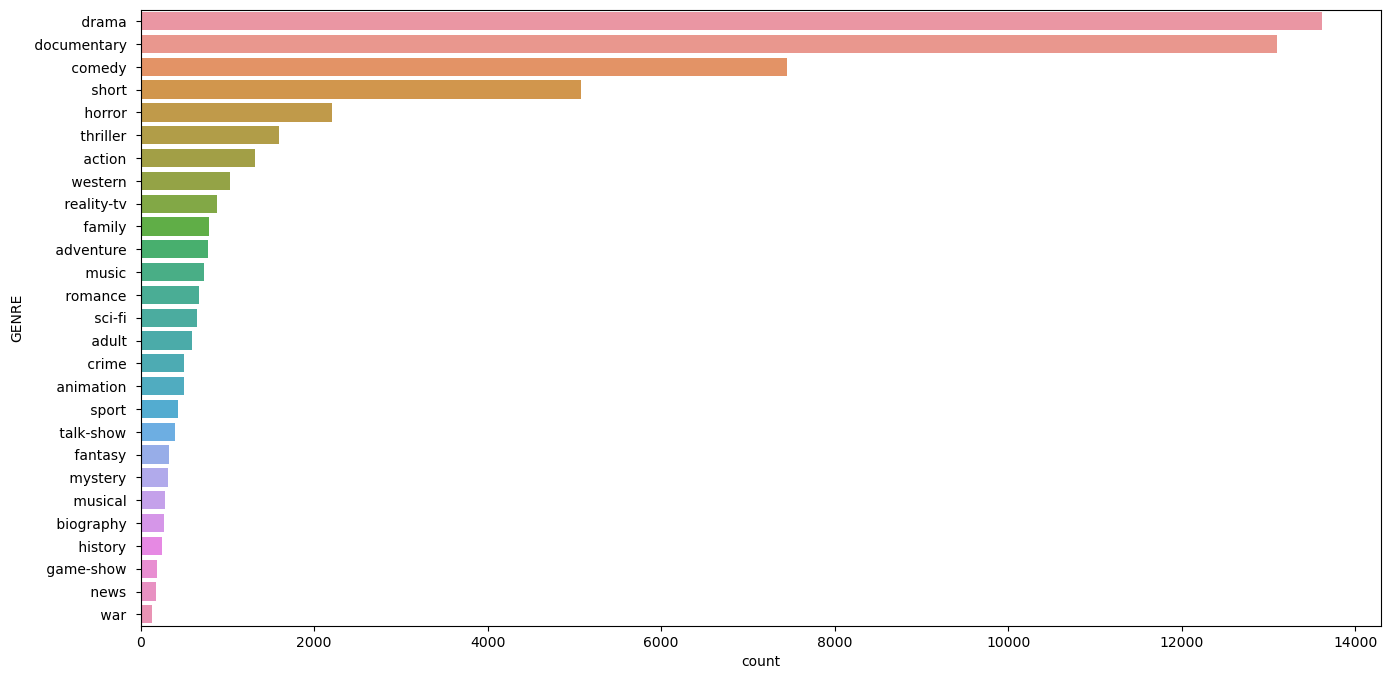

In [6]:
plt.figure(figsize=(16,8))
sns.countplot(y=train_data['GENRE'],order=train_data['GENRE'].value_counts().index)

In [7]:
train_data['DES_LEN']=train_data['DESCRIPTION'].apply(len)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ' drama '),
  Text(1, 0, ' thriller '),
  Text(2, 0, ' adult '),
  Text(3, 0, ' documentary '),
  Text(4, 0, ' comedy '),
  Text(5, 0, ' crime '),
  Text(6, 0, ' reality-tv '),
  Text(7, 0, ' horror '),
  Text(8, 0, ' sport '),
  Text(9, 0, ' animation '),
  Text(10, 0, ' action '),
  Text(11, 0, ' fantasy '),
  Text(12, 0, ' short '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' music '),
  Text(15, 0, ' adventure '),
  Text(16, 0, ' talk-show '),
  Text(17, 0, ' western '),
  Text(18, 0, ' family '),
  Text(19, 0, ' mystery '),
  Text(20, 0, ' history '),
  Text(21, 0, ' news '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' romance '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' musical '),
  Text(26, 0, ' war ')])

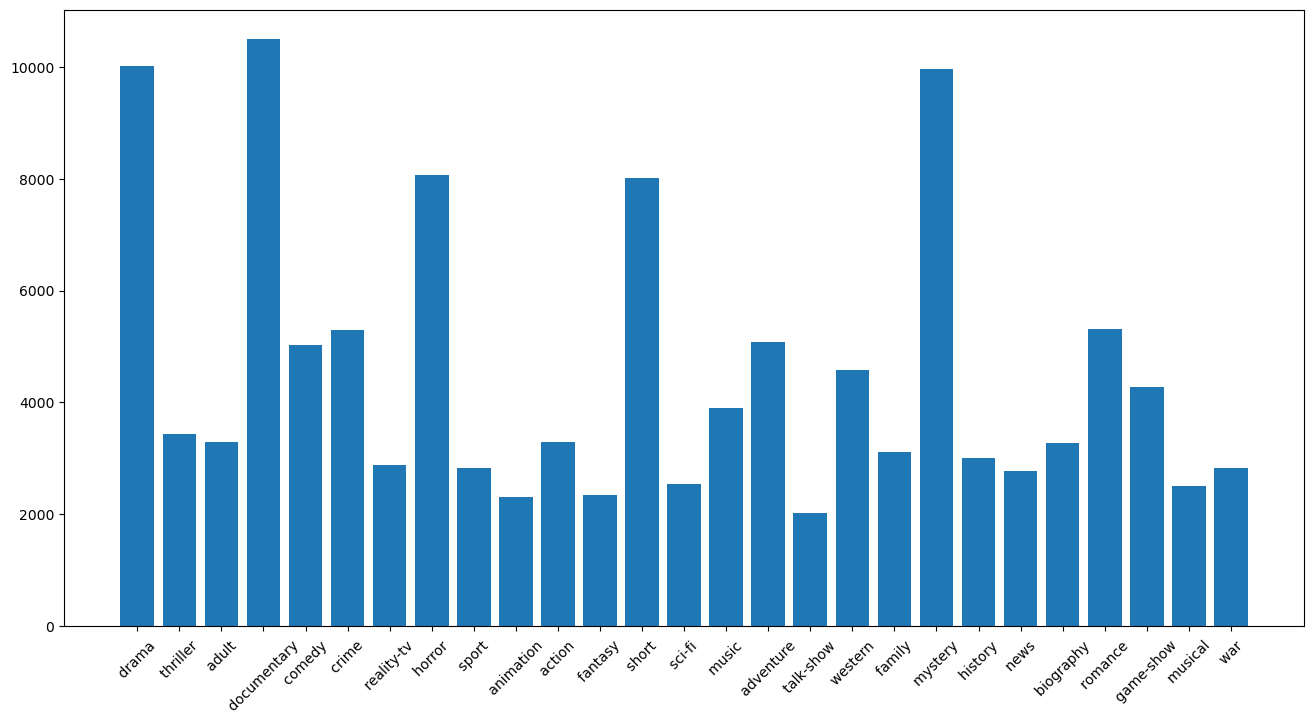

In [8]:
plt.figure(figsize=(16,8))
plt.bar(train_data['GENRE'],train_data['DES_LEN'])
plt.xticks(rotation=45)

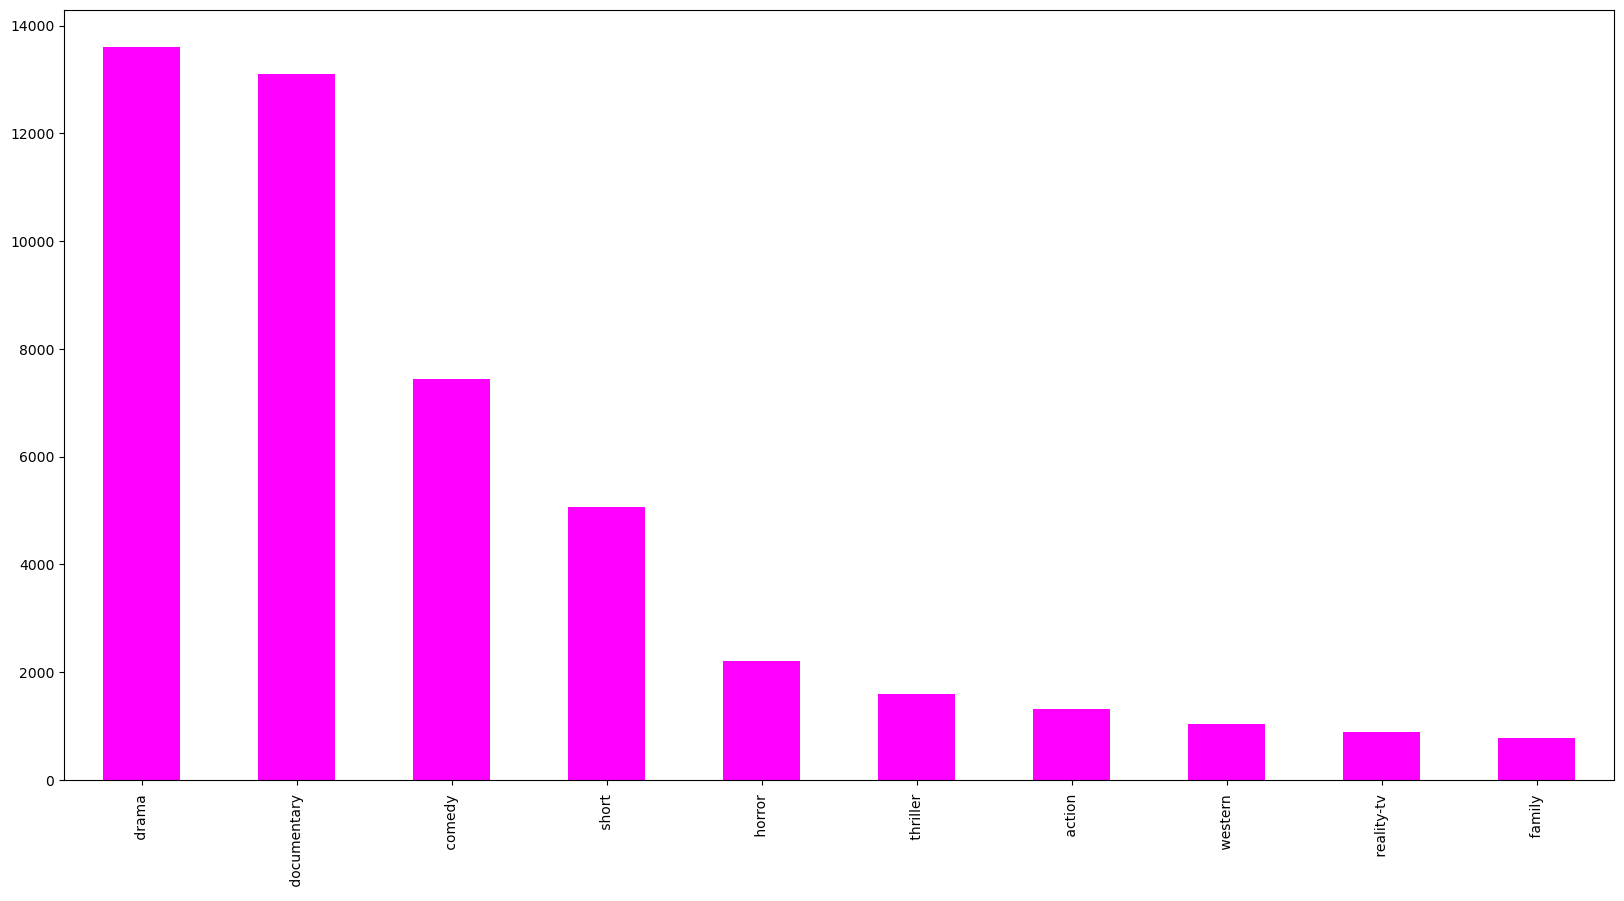

In [9]:
top_10=train_data['GENRE'].value_counts().head(10)
plt.figure(figsize=(20,10))
top_10[::-1].plot(kind='bar',color='magenta')
plt.gca().invert_xaxis()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [11]:
train_data['DESCRIPTION'].fillna("",inplace=True)
test_data['DESCRIPTION'].fillna("",inplace=True)
t_v=TfidfVectorizer(stop_words='english',max_features=6)
x_train=t_v.fit_transform(train_data['DESCRIPTION'])
X_test=t_v.fit_transform(test_data['DESCRIPTION'])

In [12]:
le=LabelEncoder()
y_train=le.fit_transform(train_data['GENRE'])
Y_test=le.fit_transform(test_data_solution['GENRE'])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state=101,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((43371, 6), (10843, 6), (43371,), (10843,))

In [15]:
from sklearn.svm import LinearSVC

In [16]:
model1=LinearSVC()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)

In [17]:
pred

array([8, 8, 8, ..., 8, 8, 8])

In [18]:
model1.score(x_test,y_test)

0.31679424513511023

In [19]:
from sklearn.metrics import classification_report

In [20]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       285
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00       168
           3       0.00      0.00      0.00        99
           4       0.00      0.00      0.00        56
           5       0.00      0.00      0.00      1502
           6       0.00      0.00      0.00       123
           7       0.38      0.50      0.43      2589
           8       0.29      0.79      0.42      2727
           9       0.00      0.00      0.00       169
          10       0.00      0.00      0.00        58
          11       0.00      0.00      0.00        38
          12       0.00      0.00      0.00        46
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       137
          15       0.00      0.00      0.00        74
          16       0.00      0.00      0.00        61
          17       0.00    

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [23]:
print(y_pred)

[8 8 8 ... 8 8 8]


In [24]:
clf.score(x_test,y_test)

0.31651756893848565

In [25]:
cr=classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.49      0.38      0.43      3332
           8       0.79      0.29      0.42      7511
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
val=model1.predict(X_test)

In [27]:
cr=classification_report(val,Y_test[:54200])
print(cr)

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.32      0.24      0.28     17345
           8       0.68      0.25      0.37     36855
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
cr=classification_report(pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.50      0.37      0.43      3475
           8       0.78      0.29      0.42      7368
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import confusion_matrix

<Axes: >

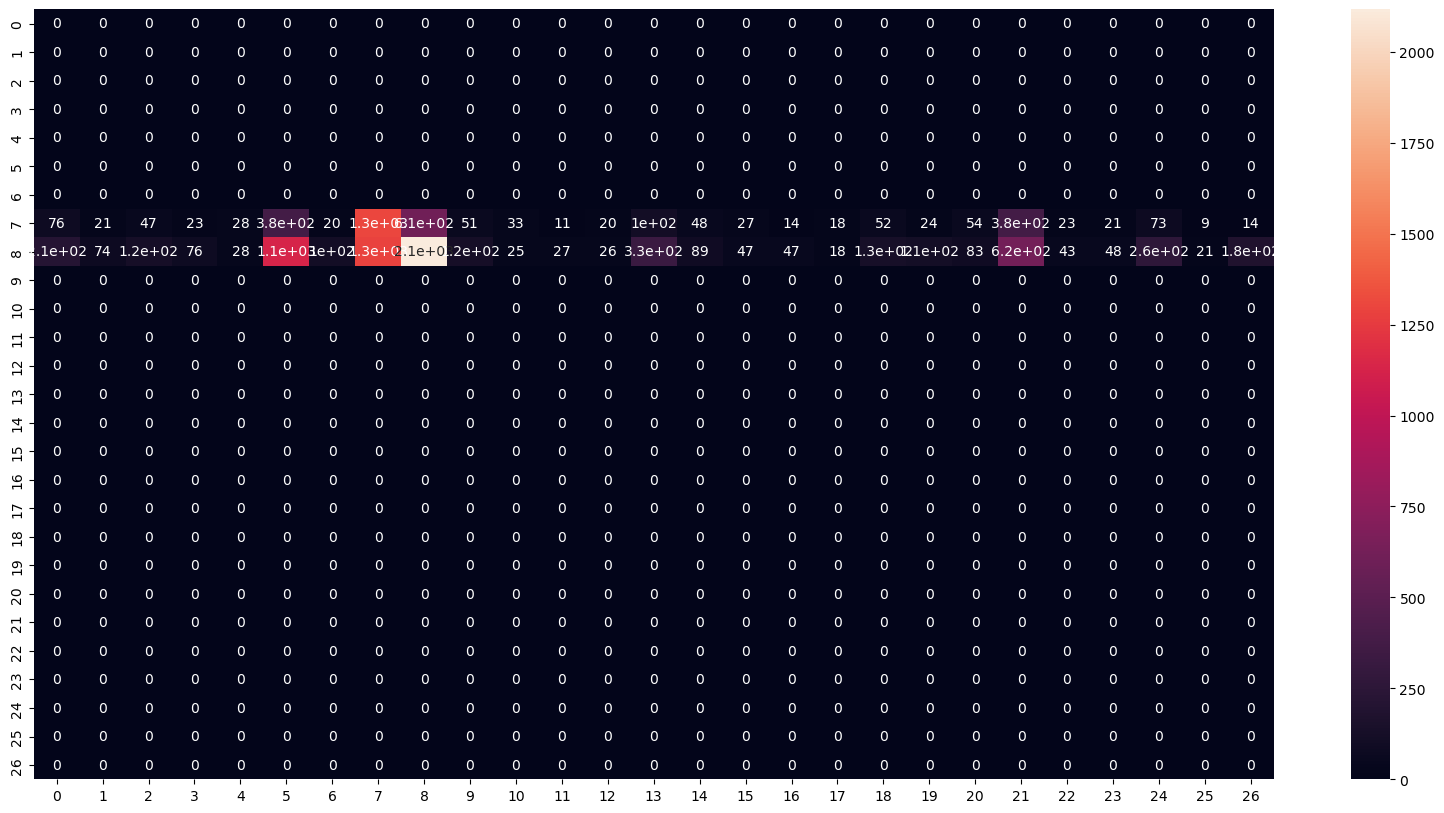

In [32]:
cm=confusion_matrix(pred,y_test)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)

In [33]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = model1.predict(t_v1)
    return le.inverse_transform(pred_label)[0]

In [34]:
sample_descr_for_movie = "kunfu panda attains his inner power"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him"
print(predict_movie(sample_descr_for_movie1))

 drama 
 drama 


In [35]:
from joblib import dump

In [36]:
dump(model1,"movie-genre.joblib")

['movie-genre.joblib']